Per Capita Income Consolidation (1950–Present)

Countries: Singapore, Taiwan, South Korea, Japan

This notebook fetches and consolidates per capita income data from DGBAS and World Bank into an Excel file.

In [2]:
# Core dependencies
!pip install pandas
!pip install openpyxl

# Data source
!pip install wbdata
!pip install pandas wbdata openpyxl

# Visualization
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


📘 Step 1: Replace DGBAS.xlsx file and clean Taiwan GNI Data from DGBAS.xlsx into Taiwan.xlsx

In [3]:
## Import necessary libraries
import pandas as pd

# Load the raw DGBAS file
raw_df = pd.read_excel("dgbas.xlsx", header=None)

# Extract the useful data range
# Real data starts at row 4 (index 4)
data_block = raw_df.iloc[4:, [0, 1, 9, 10, 11]]
data_block.columns = ["Year", "Population", "GNI_CurrentUSD_million", "PerCapitaGNI_NT", "PerCapitaGNI_CurrentUSD"]

# Drop rows where Year is not a valid number
data_block = data_block[pd.to_numeric(data_block["Year"], errors="coerce").notna()]
data_block["Year"] = data_block["Year"].astype(int)

# Add additional required columns for standardization
data_block["Country"] = "Taiwan"
data_block["Source"] = "DGBAS"
data_block["PerCapitaIncome_ConstantUSD"] = None
data_block["GDP_CurrentUSD"] = None
data_block["PPP_Adjusted"] = None

# Reorder columns (renaming the GNI field accordingly)
taiwan_clean = data_block[[ 
    "Country", "Year", "PerCapitaGNI_CurrentUSD", "PerCapitaIncome_ConstantUSD",
    "GDP_CurrentUSD", "Population", "PPP_Adjusted", "Source", "GNI_CurrentUSD_million"
]]

# Save to Excel
taiwan_clean.to_excel("taiwan_gni.xlsx", index=False)
print("✅ Saved cleaned Taiwan GNI data to taiwan_gni.xlsx")

✅ Saved cleaned Taiwan GNI data to taiwan_gni.xlsx


🌍 Step 2: Fetch GNI per Capita for SG, JP, KR (World Bank via wbdata)

In [5]:
# Import libraries
import pandas as pd
import wbdata
import datetime

# Indicator and date range (GNI per capita, current USD)
indicator = {"NY.GNP.PCAP.CD": "PerCapitaGNI_CurrentUSD"}
data_date = (datetime.datetime(1960, 1, 1), datetime.datetime(2023, 1, 1))

# Country ISO3 codes
countries = {
    "SGP": "Singapore",
    "JPN": "Japan",
    "KOR": "Korea"
}

# Fetch data for each country
def fetch_from_wb(iso_list, country_name):
    df = wbdata.get_dataframe(indicator, country=iso_list, date=data_date)
    df.reset_index(inplace=True)
    df = df.rename(columns={
        "date": "Year",
        "country": "CountryCode",
        list(indicator.values())[0]: "PerCapitaGNI_CurrentUSD"
    })

    df["Year"] = pd.to_datetime(df["Year"]).dt.year
    df["Country"] = country_name
    df["Source"] = "World Bank (wbdata)"
    df["PerCapitaIncome_ConstantUSD"] = None
    df["Population"] = None
    df["PPP_Adjusted"] = None
    df["GNI_CurrentUSD_million"] = None

    return df[[ 
        "Country", "Year", "PerCapitaGNI_CurrentUSD", "PerCapitaIncome_ConstantUSD",
        "Population", "PPP_Adjusted", "Source", "GNI_CurrentUSD_million"
    ]]

# Apply to all 3 countries
sg_df = fetch_from_wb(["SGP"], "Singapore")
jp_df = fetch_from_wb(["JPN"], "Japan")
kr_df = fetch_from_wb(["KOR"], "Korea")

# Combine and export
combined_gni = pd.concat([sg_df, jp_df, kr_df])
combined_gni.to_excel("openbb_countries.xlsx", index=False)
print("✅ Saved World Bank GNI data to openbb_countries.xlsx")

✅ Saved World Bank GNI data to openbb_countries.xlsx


🔗 Step 3: Combine Taiwan + World Bank Data

In [6]:
# Load both data sources
taiwan = pd.read_excel("taiwan_gni.xlsx")
openbb_countries = pd.read_excel("openbb_countries.xlsx")

# Combine and sort
combined = pd.concat([taiwan, openbb_countries])
combined = combined.sort_values(by=["Country", "Year"]).reset_index(drop=True)

# Export final dataset
combined.to_excel("per_capita_income_consolidated.xlsx", index=False)
print("✅ Saved full dataset to per_capita_income_consolidated.xlsx")

✅ Saved full dataset to per_capita_income_consolidated.xlsx


📊 Optional: Preview Cleaned Data

In [7]:
# Load final dataset
df = pd.read_excel("per_capita_income_consolidated.xlsx")
df.head(10)

,Country,Year,PerCapitaGNI_CurrentUSD,PerCapitaIncome_ConstantUSD,GDP_CurrentUSD,Population,PPP_Adjusted,Source,GNI_CurrentUSD_million
0,Japan,1960,NaN,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
1,Japan,1961,NaN,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
2,Japan,1962,650.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
3,Japan,1963,740.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
4,Japan,1964,860.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
5,Japan,1965,960.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
6,Japan,1966,1110.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
7,Japan,1967,1290.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
8,Japan,1968,1530.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN
9,Japan,1969,1790.0,NaN,NaN,NaN,NaN,World Bank (wbdata),NaN


📈 Optional: Plot GNI Per Capita Over Time (Current USD)

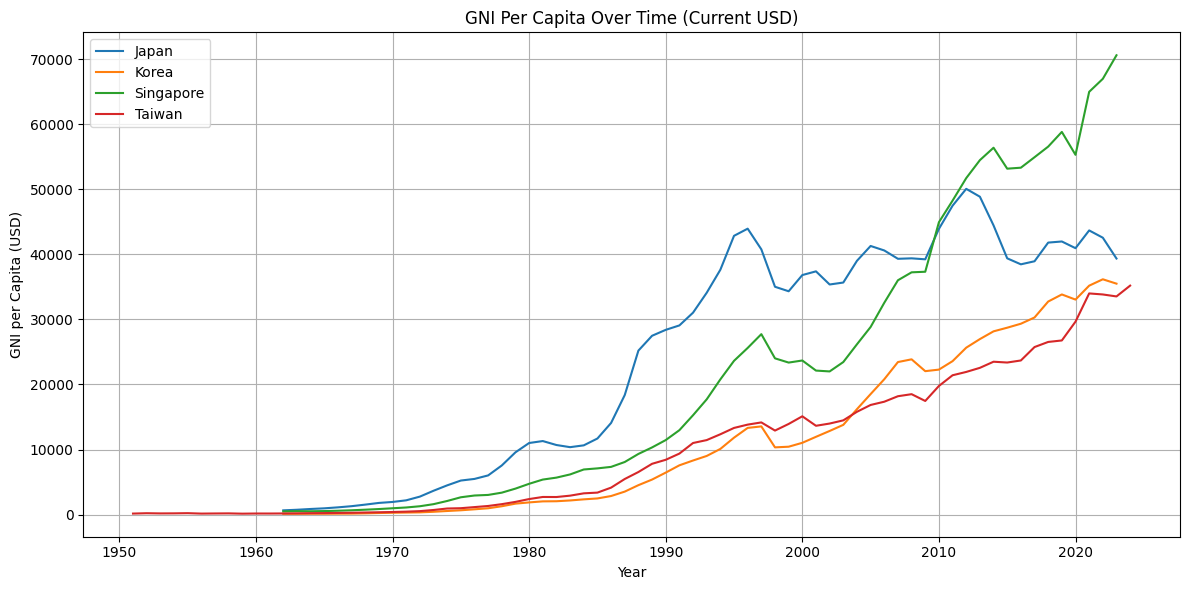

In [9]:
# Import libraries
import matplotlib.pyplot as plt

# Line plot: GNI Per Capita over time by country
plt.figure(figsize=(12, 6))
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    plt.plot(subset["Year"], subset["PerCapitaGNI_CurrentUSD"], label=country)

plt.title("GNI Per Capita Over Time (Current USD)")
plt.xlabel("Year")
plt.ylabel("GNI per Capita (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📉 Optional: Histogram of GNI Per Capita (All Years)

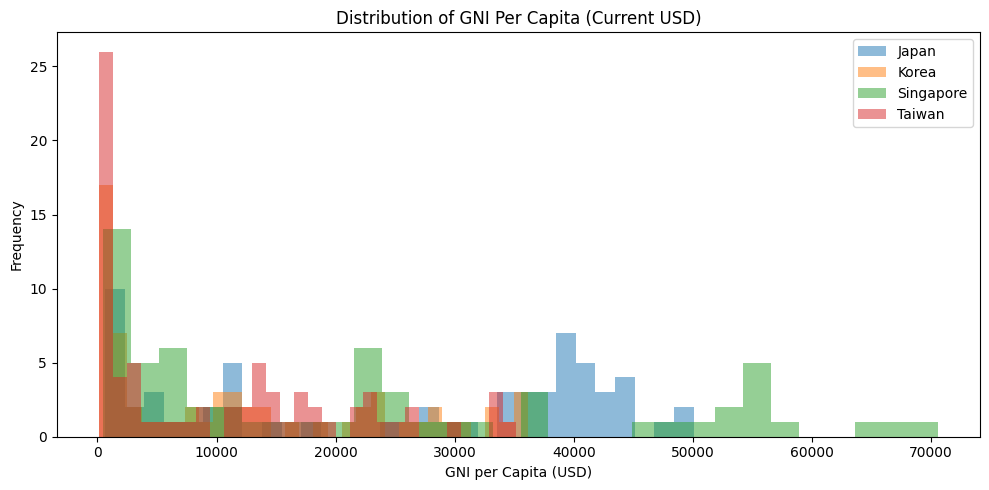

In [10]:
plt.figure(figsize=(10, 5))
for country in df["Country"].unique():
    subset = df[df["Country"] == country]
    plt.hist(subset["PerCapitaGNI_CurrentUSD"].dropna(), bins=30, alpha=0.5, label=country)

plt.title("Distribution of GNI Per Capita (Current USD)")
plt.xlabel("GNI per Capita (USD)")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

📊 Optional: Show Data Summary by Country

In [11]:
df.groupby("Country")["PerCapitaGNI_CurrentUSD"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Japan,62.0,25024.032258,17165.731060,650.0,6402.5,32560.0,39380.0,50060.0
Korea,62.0,11847.258065,11928.011964,120.0,1047.5,8660.0,22220.0,36160.0
Singapore,62.0,22276.612903,21501.971312,490.0,3107.5,16490.0,36925.0,70590.0
Taiwan,74.0,9982.756757,10524.388830,140.0,366.0,6004.5,17221.0,35188.0
